<a href="https://colab.research.google.com/github/DaavidUc/CodigosFinancieros/blob/main/Rendimientos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En este Notebook se presentará cómo obtener información de Yahoo Finance para una acción, así mismo, mostrará como obtener los rendimientos, los tipos de rendimientos que existen, el rendimiento esperado, la volatilidad y el coeficiente de variación. Esto se realizó basandonme en los apuntes de mi clase de Métodos Estadísticos Aplicados a Finanzas de la Especialidad de Ingeniería Financiera de la UNAM. 

Se cargan las librerías necesarias: yfinance es la que permite la descarga de información de las acciones. 

In [4]:
#pip install yfinance

In [2]:
import yfinance as yf
from datetime import date
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.colors

import pandas as pd
import numpy as np

Utilizaremos la información de los últimos 5 años, ya que se considera que un ciclo financiero completo es de 5 años.

In [68]:
hoy = date.today()

inicio = hoy - relativedelta(years=5)

Descargamos la información, solo nos interesa el precio ajustado al cierre, este ya está ajustado para dividendos y splits. Si se necesita el precio de apertura (open) o el precio alto (high) basta con sustituirlo. Así mismo, podemos solicitar las acciones que se necesiten utilizando sus simbolos o, en inglés, stock ticker symbols. En este caso se utilizará información de Apple Inc. (AAPL). Las fechas se colocan como argumentos de la función. Para más información se puede consultar la [Documentación](https://pypi.org/project/yfinance/)

In [69]:
datos = yf.download('AAPL',inicio, hoy)[['Adj Close']]

[*********************100%***********************]  1 of 1 completed


Visualizamos la información, se tienen 1259 datos, es decir, los precios de los últimos 1259 días (5 años). Cada año de Trading está compuesto por 252 días. 

In [70]:
datos

,Adj Close
Date,
2017-06-01,36.252583
2017-06-02,36.789814
2017-06-05,36.430092
2017-06-06,36.553146
2017-06-07,36.770885
...,...
2022-05-24,140.360001
2022-05-25,140.520004
2022-05-26,143.779999


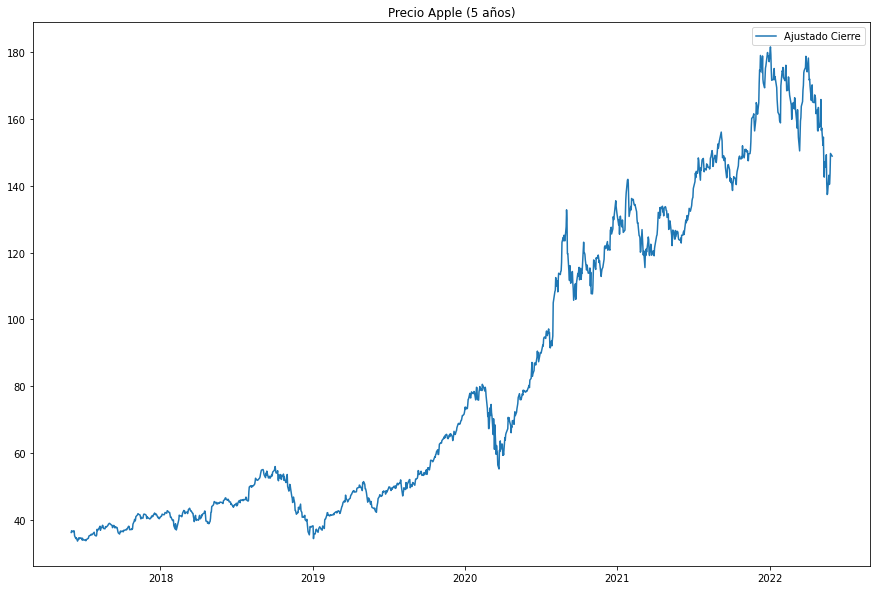

In [79]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(datos['Adj Close'], label='Ajustado Cierre')
ax.set_title('Precio Apple (5 años)')
ax.legend()

Podemos obtener una descripción rápida de los precios.

In [72]:
datos.describe()

,Adj Close
count,1259.000000
mean,84.069613
std,45.922468
min,33.670547
25%,43.905592
50%,63.640717
75%,126.606667
max,181.511703


Sin embargo, esta no es de mucha utilidad para su analisis, es mucho más enriquecedor conocer los rendimientos, es decir, la diferencia entre los precios sucesivos. Hay dos formas de calcularlos: aritméticos o logaritmicos.

Los rendimientos aritméticos se obtienen utilizando la formula: 

$rA_t = \frac{P_t-P_{t-1}}{P_{t-1}}$

Los rendimientos logaritmicos se obtienen utilizando: 

$rL_t = Ln (\frac{P_t}{P_{t-1}})$

Ambos rendimientos pueden ser interpretados en forma porcentual y son prácticamente iguales para variaciones menores al 15%. Así mismo, por lo general, se asume que los rendimientos siguen una distribución normal y los rendimientos logaritmicos tienen una ventaja en ese aspecto, ya que el acumulado es una suma y la suma de varias variables aleatorias normales sigue siendo normal, en el caso de los aritméticos, es una multiplicación. 

In [73]:
datos_close = datos.copy()

datos_close['Rend Arimetico'] = (datos_close.pct_change(1))

datos_close['Rend Logaritmico'] = ((np.log(datos['Adj Close'])-np.log(datos['Adj Close'].shift(1))))


In [74]:
datos_close.describe()

,Adj Close,Rend Arimetico,Rend Logaritmico
count,1259.000000,1258.000000,1258.000000
mean,84.069613,0.001324,0.001123
std,45.922468,0.020032,0.020053
min,33.670547,-0.128647,-0.137708
25%,43.905592,-0.007956,-0.007988
50%,63.640717,0.001205,0.001204
75%,126.606667,0.011714,0.011646
max,181.511703,0.119808,0.113157


Esto nos permite obtener más información que los precios, por ejemplo, observamos que la mayor ganancia registrada para la acción está entre el 12% y 13%. En este caso, es de mucho interes la media y la desviación estandar las cuales se abordarán más adelante. 

Graficamos los rendimientos calculados

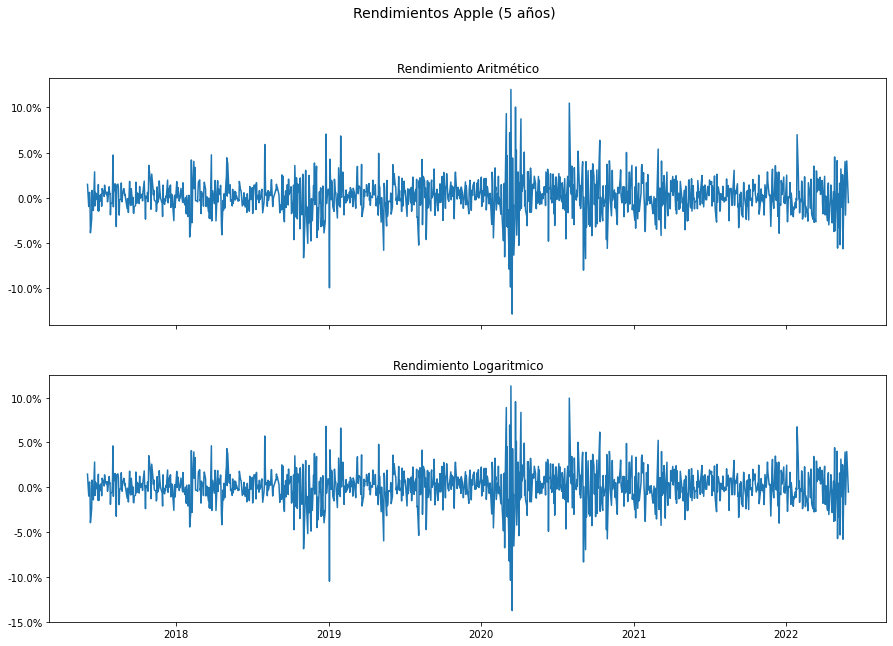

In [76]:
fig, axs = plt.subplots(2, sharex=True, figsize=(15, 10))
fig.suptitle('Rendimientos Apple (5 años)', size=14)
axs[0].plot(datos_close['Rend Arimetico'])
axs[0].set_title('Rendimiento Aritmético')
axs[0].yaxis.set_major_formatter(mtick.PercentFormatter(1,symbol = '%'))
axs[1].plot(datos_close['Rend Logaritmico'])
axs[1].set_title('Rendimiento Logaritmico')
axs[1].yaxis.set_major_formatter(mtick.PercentFormatter(1,symbol = '%'))

Como puede observarse, las distribuciones de los rendimientos son practicamente iguales. 

Obtenemos el rendimiento acumulado, es decir, el rendimiento total del activo en el periodo de tiempo estudiado. 

Para los rendimientos aritméticos, la formula es:

$RA_t = (1+RA_{t-1}) \cdot (1+rA_t)-1$

Para los rendimientos logaritmicos, la formula es:

$RL_t = \sum_{i=1}^{i=t} rL_i$

Estos rendimientos son iguales en periodos de baja volatilidad, sin embargo, si la acción presenta cambios mayores al 15% comienzan a discrepar. Como puede observarse en la siguiente gráfica.

In [80]:
datos_close['Acumulado Aritmetico'] = datos_close['Rend Arimetico'].add(1).cumprod().sub(1)

datos_close['Acumulado Logaritmico'] = (datos_close['Rend Logaritmico']).cumsum()

Text(0.5, 1.0, 'Rendimiendos Acumulados')

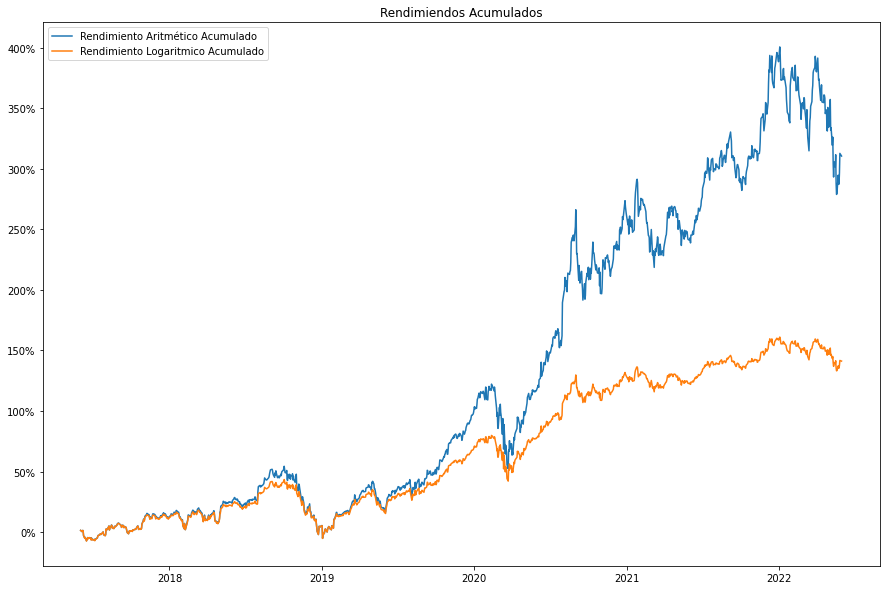

In [82]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(datos_close['Acumulado Aritmetico'], label='Rendimiento Aritmético Acumulado')
ax.plot(datos_close['Acumulado Logaritmico'], label='Rendimiento Logaritmico Acumulado')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1,symbol = '%'))
ax.legend()
ax.set_title('Rendimiendos Acumulados')

Sin embargo, los rendimientos logaritmicos son muy utilizados por las ventajas matemáticas que proporcionan. 

Como se mencionó, la media y la desviación estandar de los rendimientos son de suma importancia. La media se conoce como rendimiento promedio, por otro lado, la desviación estandar se conoce como volatilidad. Estos son los momentos de las series financieras. 

El rendimiento promedio, en el caso de los rendimientos logaritmicos se obtiene como la media aritmética, es decir: 

$\bar{r} = \frac{1}{T} \sum_{t=1}^{T} r_i$ 

Para los rendimientos aritméticos se debe obtener la media geométrica. 

La volatilidad se obtiene como: 

$ Volatilidad = \sqrt{s^2} = \sqrt{\frac{\sum_{t=1}^{T} (r_i - \bar{r})^2}{T-1}}$ 

Los activos más volatiles tienden a ser más riesgosos. 

In [105]:
volatilidad = datos_close['Rend Logaritmico'].std()

print(f"La volatilidad de Apple es de {volatilidad*100:.2f}%")

rendimiento_medio = datos_close['Rend Logaritmico'].mean()

print(f"El rendimiento promedio de Apple es de {rendimiento_medio*100:.2f}%")


La volatilidad de Apple es de 2.01%
El rendimiento promedio de Apple es de 0.11%


Podemos observar que Apple gana, en promedio, 0.11% al día. La variación respecto a este rendimiento promedio es de 2%, es decir, la volatilidad. Esto puede ser hacia arriba o hacia abajo. 

Finalmente, se puede utiliza el coeficiente de variación, es decir, el rendimiento esperado por unidad de volatilidad: 

$Coeficiente = \frac{\bar{r}}{Volatilidad}$

Aquellas empresas que tengan un mayor coeficiente de variación son las más optimas para invertir. 

In [109]:
coeficiente = rendimiento_medio / volatilidad

print(f"El coeficiente de variación de Apple es de {coeficiente:.2f}%")

El coeficiente de variación de Apple es de 0.06%


Es decir, por cada unidad de volatilidad, se obtiene un 0.06 de rendimiento. 